In [1]:
#! pip install torch-summary #for visualizing the CNN

In [2]:
#download dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NPMGpcdM9OEiv9j40axB-ikKyz1N38mv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NPMGpcdM9OEiv9j40axB-ikKyz1N38mv" -O euroSAT_tvt_pkl.zip && rm -rf /tmp/cookies.txt

--2022-04-05 16:11:02--  https://docs.google.com/uc?export=download&confirm=t&id=1NPMGpcdM9OEiv9j40axB-ikKyz1N38mv
Resolving docs.google.com (docs.google.com)... 173.194.215.139, 173.194.215.113, 173.194.215.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vdafdgrfkfmf8qksf2ehrl67ossapn5k/1649175000000/06319575137151008904/*/1NPMGpcdM9OEiv9j40axB-ikKyz1N38mv?e=download [following]
--2022-04-05 16:11:02--  https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vdafdgrfkfmf8qksf2ehrl67ossapn5k/1649175000000/06319575137151008904/*/1NPMGpcdM9OEiv9j40axB-ikKyz1N38mv?e=download
Resolving doc-00-ag-docs.googleusercontent.com (doc-00-ag-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-00-ag-docs.googleusercontent.com (doc-

In [3]:
!unzip euroSAT_tvt_pkl.zip

Archive:  euroSAT_tvt_pkl.zip
  inflating: euroSAT_train_val_test.pkl  


In [4]:
from PIL import Image 

## PyTorch
import torch
from torch import Tensor
import torch.utils.data as data
from sklearn.metrics import classification_report
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
 
# Torchvision
import torchvision
from torchvision import transforms

#from torchsummary import summary

In [5]:
#setting the seed value
torch.manual_seed(39)
import random
random.seed(39)
np.random.seed(39)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
#define the CNN architecture
class CNN(nn.Module):

    def __init__(self,inp_chan,nclasses):
        super().__init__()
 
        
        self.layer1 = nn.Sequential(
                      nn.Conv2d(inp_chan, 64, kernel_size=3, stride=2, padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2))
        
        self.layer2 =nn.Sequential(
                    nn.Conv2d(64,96, kernel_size=3,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2))
        
        self.layer3 = nn.Sequential(
                    nn.Conv2d(96,192, kernel_size=3,padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2))
        
        self.fc1 = nn.Sequential(
                   nn.Linear(3072, 1024, bias=True),
                   nn.ReLU()
                    )
        
        self.fc2 = nn.Sequential(
                   nn.Linear(1024, 512, bias=True),
                   nn.ReLU())
        
        self.fc3 = nn.Linear(512, 10, bias=True)
        self.dropout=nn.Dropout(p=0.5)
        self.flatten=nn.Flatten()
        
        

    def forward(self, x: Tensor) -> Tensor:
        t=self.layer1(x)
        t=self.layer2(t)
        t=self.layer3(t)
        t=self.flatten(t)
        t=self.fc1(t)
        t=self.dropout(t)
        t=self.fc2(t)
        t=self.fc3(t)

       
        return t
       

In [7]:
#create instance of CNN model
model=CNN(3,10)
model=model.to(device)

In [8]:
#visualize the model 
#summary(model,(3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          1,792
|    └─ReLU: 2-2                         [-1, 64, 32, 32]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 16, 16]          --
├─Sequential: 1-2                        [-1, 96, 8, 8]            --
|    └─Conv2d: 2-4                       [-1, 96, 16, 16]          55,392
|    └─ReLU: 2-5                         [-1, 96, 16, 16]          --
|    └─MaxPool2d: 2-6                    [-1, 96, 8, 8]            --
├─Sequential: 1-3                        [-1, 192, 4, 4]           --
|    └─Conv2d: 2-7                       [-1, 192, 8, 8]           166,080
|    └─ReLU: 2-8                         [-1, 192, 8, 8]           --
|    └─MaxPool2d: 2-9                    [-1, 192, 4, 4]           --
├─Flatten: 1-4                           [-1, 3072]                --
├─S

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          1,792
|    └─ReLU: 2-2                         [-1, 64, 32, 32]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 16, 16]          --
├─Sequential: 1-2                        [-1, 96, 8, 8]            --
|    └─Conv2d: 2-4                       [-1, 96, 16, 16]          55,392
|    └─ReLU: 2-5                         [-1, 96, 16, 16]          --
|    └─MaxPool2d: 2-6                    [-1, 96, 8, 8]            --
├─Sequential: 1-3                        [-1, 192, 4, 4]           --
|    └─Conv2d: 2-7                       [-1, 192, 8, 8]           166,080
|    └─ReLU: 2-8                         [-1, 192, 8, 8]           --
|    └─MaxPool2d: 2-9                    [-1, 192, 4, 4]           --
├─Flatten: 1-4                           [-1, 3072]                --
├─S

In [9]:
#split the dataset into train,validation and test dataset
import pickle
with open("euroSAT_train_val_test.pkl", 'rb') as f:
    train_set, val_set, test_set = pickle.load(f)
print (len(train_set), len(val_set), len(test_set)) # 18792 2808 5400
print (train_set[0][0].shape, train_set[0][1]) # (3, 64, 64) 7

18792 2808 5400
(3, 64, 64) 7


In [10]:
NBATCH=64

In [11]:
#convert dataset into pytorch dataloader
train_loader = data.DataLoader(train_set, batch_size=NBATCH, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
val_loader = data.DataLoader(val_set, batch_size=NBATCH, shuffle=False, drop_last=False, num_workers=4)
test_loader = data.DataLoader(test_set, batch_size=NBATCH, shuffle=False, drop_last=False, num_workers=4)
trainSteps = len(train_loader.dataset) // NBATCH
valSteps = len(val_loader.dataset) // NBATCH

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [12]:
#define loss function and optimizer 
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.0002)

In [13]:
#define path to store best model
import os
if not os.path.exists('logs_cnn/'):
  os.mkdir('logs_cnn/')
model_name='logs_cnn/best_model_cnn.pt'


In [14]:
'''
This code block basically push the model on the google drive.
'''
#push the model to the directory on google drive, which is publicly visible
#from google.colab import drive
#drive.mount('/content/drive') 

#import os
#if not os.path.exists('/content/drive/MyDrive/21CS60R39_assignment8/logs_cnn/'):
#  os.mkdir('/content/drive/MyDrive/21CS60R39_assignment8/logs_cnn/')
#model_name='/content/drive/MyDrive/21CS60R39_assignment8/logs_cnn/best_model_cnn.pt'


Mounted at /content/drive


In [15]:
train_losses = []
val_losses = []
train_acc=[]
val_acc=[]

#define training method with early stopping criterion    
def train_model(model, batchsize, patience, epochs,modelname):
    best_loss=100000000
    counter=0
    #model_name='logs_cnn/best_model.pt'
    for epoch in range(1, epochs + 1):
        totalTrainLoss = 0
        totalValLoss = 0
        trainCorrect = 0
        valCorrect = 0
        model.train() 
        for batch, (data, target) in enumerate(train_loader, 1):
            (data, target) = (data.to(device), target.to(device))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            totalTrainLoss += loss
            trainCorrect += (output.argmax(1) == target).type(torch.float).sum().item()
            

        with torch.no_grad():
            model.eval() 
            for data, target in val_loader:
                (data, target) = (data.to(device), target.to(device))
                output = model(data)
                loss = criterion(output, target)
                totalValLoss += loss
                valCorrect += (output.argmax(1) == target).type(torch.float).sum().item()
        
        avgTrainLoss = totalTrainLoss / trainSteps
        avgValLoss = totalValLoss / valSteps
        trainCorrect = trainCorrect / len(train_loader.dataset)
        valCorrect = valCorrect / len(val_loader.dataset)
        train_losses.append(avgTrainLoss.cpu().detach().numpy())
        train_acc.append(trainCorrect)
        val_losses.append(avgValLoss.cpu().detach().numpy())
        val_acc.append(valCorrect)
        
        print("EPOCH: {}/{}".format(epoch, n_epochs))
        print("Train loss: {:.5f}, Train accuracy: {:.5f}".format(avgTrainLoss, trainCorrect))
        print("Val loss: {:.5f}, Val accuracy: {:.5f}\n".format(avgValLoss, valCorrect))
        if avgValLoss < best_loss:
            best_loss = avgValLoss
            counter = 0
            torch.save(model.state_dict(), modelname)
            
        else:
            counter += 1
            
            if counter> patience :
                print("Early stopping with minimum validation loss: ", best_loss)
                break
   
    checkpoint = torch.load(modelname)
    model.load_state_dict(checkpoint)

    return  model

In [16]:
patience=8
n_epochs=50
model=train_model(model, NBATCH, patience, n_epochs,model_name)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


EPOCH: 1/50
Train loss: 1.59560, Train accuracy: 0.35047
Val loss: 1.30840, Val accuracy: 0.51246

EPOCH: 2/50
Train loss: 1.15528, Train accuracy: 0.55391
Val loss: 1.00293, Val accuracy: 0.64850

EPOCH: 3/50
Train loss: 1.00093, Train accuracy: 0.63006
Val loss: 0.97015, Val accuracy: 0.65278

EPOCH: 4/50
Train loss: 0.85021, Train accuracy: 0.68423
Val loss: 0.74213, Val accuracy: 0.72578

EPOCH: 5/50
Train loss: 0.77000, Train accuracy: 0.71637
Val loss: 0.71880, Val accuracy: 0.74751

EPOCH: 6/50
Train loss: 0.71911, Train accuracy: 0.73696
Val loss: 0.71960, Val accuracy: 0.74074

EPOCH: 7/50
Train loss: 0.67437, Train accuracy: 0.75426
Val loss: 0.68843, Val accuracy: 0.75712

EPOCH: 8/50
Train loss: 0.66711, Train accuracy: 0.75415
Val loss: 0.63811, Val accuracy: 0.77386

EPOCH: 9/50
Train loss: 0.62066, Train accuracy: 0.77368
Val loss: 0.57801, Val accuracy: 0.80271

EPOCH: 10/50
Train loss: 0.61121, Train accuracy: 0.77730
Val loss: 0.61760, Val accuracy: 0.78098

EPOCH: 11

In [17]:
#download model 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-2s-1fVumOtqtmJUyWKvDCUq8mDvJa95' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-2s-1fVumOtqtmJUyWKvDCUq8mDvJa95" -O logs_cnn/best_model_cnn.pt && rm -rf /tmp/cookies.txt

--2022-04-05 16:21:18--  https://docs.google.com/uc?export=download&confirm=&id=1-2s-1fVumOtqtmJUyWKvDCUq8mDvJa95
Resolving docs.google.com (docs.google.com)... 142.251.107.138, 142.251.107.101, 142.251.107.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/87vt77b9jefds2rf1hpvlbn4q29uu0d9/1649175675000/11335180243043672040/*/1-2s-1fVumOtqtmJUyWKvDCUq8mDvJa95?e=download [following]
--2022-04-05 16:21:19--  https://doc-0o-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/87vt77b9jefds2rf1hpvlbn4q29uu0d9/1649175675000/11335180243043672040/*/1-2s-1fVumOtqtmJUyWKvDCUq8mDvJa95?e=download
Resolving doc-0o-b8-docs.googleusercontent.com (doc-0o-b8-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0o-b8-docs.googleusercontent.com (doc-0

In [18]:
checkpoint = torch.load('logs_cnn/best_model_cnn.pt')
model.load_state_dict(checkpoint)
model=model.to(device)

In [19]:
#check the validation accuracy
val_correct=0
with torch.no_grad():
  model.eval()
  for (x, y) in val_loader:
    x = x.to(device)
    pred = model(x)
    val_correct += (pred.argmax(1).to(device) == y.to(device)).type(torch.float).sum().item()

val_correct = val_correct / len(val_loader.dataset)
print('validation accuracy',val_correct)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


validation accuracy 0.8885327635327636


In [20]:
#check test accuracy
test_correct=0
with torch.no_grad():
	model.eval()
	preds = []
	for (x, y) in test_loader:
		x = x.to(device)
		pred = model(x)
		preds.extend(pred.argmax(axis=1).cpu().numpy())
		test_correct += (pred.argmax(1).to(device) == y.to(device)).type(torch.float).sum().item()

test_correct = test_correct / len(test_loader.dataset)
print('Test accuracy',test_correct)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test accuracy 0.8944444444444445


In [21]:
#classification report on test dataset
labels= [val[1] for val in test_set]

print(classification_report(np.array(labels),np.array(preds)))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       600
           1       0.98      0.96      0.97       600
           2       0.90      0.85      0.88       600
           3       0.82      0.83      0.82       500
           4       0.92      0.93      0.93       500
           5       0.79      0.92      0.85       400
           6       0.78      0.81      0.80       500
           7       0.96      0.93      0.94       600
           8       0.88      0.80      0.84       500
           9       0.98      0.98      0.98       600

    accuracy                           0.89      5400
   macro avg       0.89      0.89      0.89      5400
weighted avg       0.90      0.89      0.89      5400



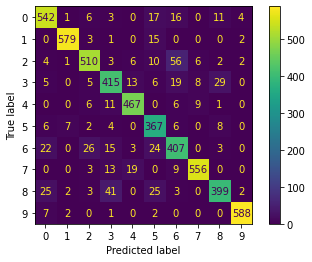

In [22]:
#heatmap for test dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

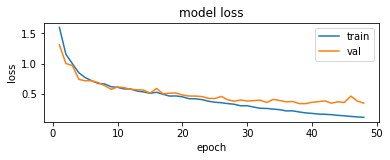

In [23]:
#plot loss vs epch graph for train and validation
import matplotlib.pyplot as plt
epochs=list(range(1,len(train_losses)+1))
plt.subplot(2,1,1)
plt.plot(epochs,train_losses,label='train')
plt.plot(epochs,val_losses,label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

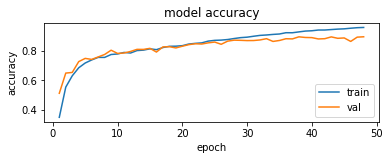

In [24]:
#plot accuracy vs epch graph for train and validation
epochs=list(range(1,len(train_acc)+1))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train')
plt.plot(epochs,val_acc,label='val')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

In [25]:
#create csv file for kaggle submission
ids=[i for i in range(len(test_loader.dataset))]
my_submission = pd.DataFrame({'id': ids, 'label': preds})
my_submission.to_csv('submission_task1.csv', index=False)